<a href="https://www.kaggle.com/code/maikytrajano/students-performance-in-exams?scriptVersionId=154906772" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Data Link: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/

## Introduction

This dataset brings information regarding students' performance. It contains the following columns:
* Gender.
* Race/Ethnicity.
* Parental level of education. 
* Lunch. Eating before the test. Values: Standard or Free/Reduced.
* Test preparation course. This course is offered prior to the test, and students have the option to complete it.

The objective of this analysis is to comprehend the factors influencing students' performance, and explore feasible and practical improvements.

## Data preparation

In [2]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Column names are too long and hard to reach. So first, we replace the columns with more accessible names and identify each data type to work on later. Shorter names will save time in terms of writing the code.

In [4]:
df.columns = ['gender', 'race', 'parent_education', 'lunch', 'course', 'math', 'reading', 'writing']
df.dtypes

gender              object
race                object
parent_education    object
lunch               object
course              object
math                 int64
reading              int64
writing              int64
dtype: object


We can transform some of the categories to integer to facilitate the data manipulation. As they can be broken down into different values, there is no loss of information in any regard. These categories being:
* Parent_education: Rate from 0 to 5 depending on the level.
* Lunch and course: Rate from 0 to 1 as a form of boolean.

We will use dictionaries in a combination with pandas .map function on these columns.

In [5]:
education_translation={'some high school':0, 'high school':1, 'some college':2, "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5}
df.loc[:,'parent_education']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parent_education, Length: 1000, dtype: object

In [6]:
df['parent_education'] = df['parent_education'].map(education_translation)
df.head()

,gender,race,parent_education,lunch,course,math,reading,writing
0,female,group B,4,standard,none,72,72,74
1,female,group C,2,standard,completed,69,90,88
2,female,group B,5,standard,none,90,95,93
3,male,group A,3,free/reduced,none,47,57,44
4,male,group C,2,standard,none,76,78,75


The column 'parent_education' is done. Now, numeric representation can simplify the interpretation of patterns and trends. 

Repeating the process for the 'course' and 'lunch' columns:

In [7]:
course_to_number = {'none':0, 'completed':1}
df['course'] = df['course'].map(course_to_number)
df.head()

,gender,race,parent_education,lunch,course,math,reading,writing
0,female,group B,4,standard,0,72,72,74
1,female,group C,2,standard,1,69,90,88
2,female,group B,5,standard,0,90,95,93
3,male,group A,3,free/reduced,0,47,57,44
4,male,group C,2,standard,0,76,78,75


In [8]:
lunch_to_number = {'free/reduced':0, 'standard':1}
df['lunch'] = df['lunch'].map(lunch_to_number)
df.head()

,gender,race,parent_education,lunch,course,math,reading,writing
0,female,group B,4,1,0,72,72,74
1,female,group C,2,1,1,69,90,88
2,female,group B,5,1,0,90,95,93
3,male,group A,3,0,0,47,57,44
4,male,group C,2,1,0,76,78,75


Now, all these columns 'parent_education', 'lunch' and 'course' are integers. This way data manipulation and analysis improves greatly.

Will create a new column called 'total_score' aswell. In near future, this column will be crucial.

In [9]:
df['total_score']=df['math']+df['reading']+df['writing']
df['total_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

Now, to end these preliminary steps, a final look onto the DataFrame.

In [10]:
df.head()

,gender,race,parent_education,lunch,course,math,reading,writing,total_score
0,female,group B,4,1,0,72,72,74,218
1,female,group C,2,1,1,69,90,88,247
2,female,group B,5,1,0,90,95,93,278
3,male,group A,3,0,0,47,57,44,148
4,male,group C,2,1,0,76,78,75,229


## Scores
Let's try to visualize now the data we have. Boxplots are a powerful tool on scores variables, as they provide key information in an extremely simple form.

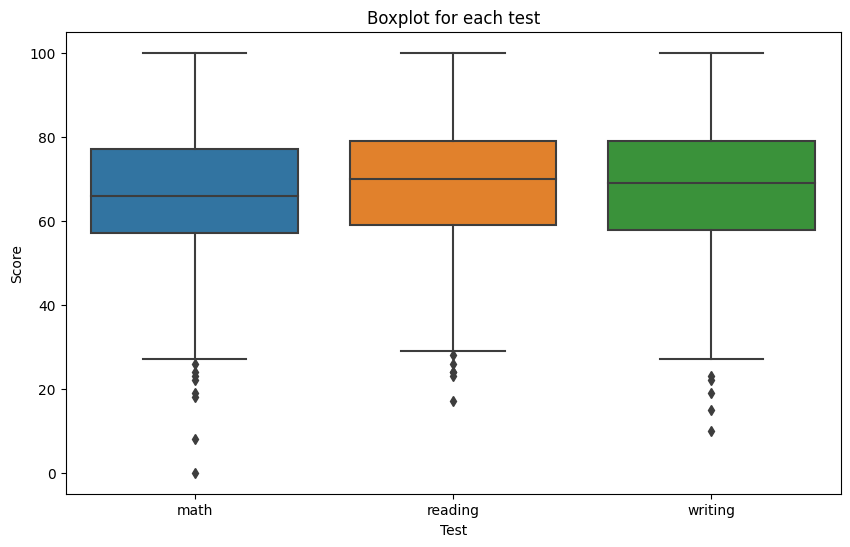

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data = [df['math'], df['reading'], df['writing']])
plt.xticks([0, 1, 2], ['math', 'reading', 'writing'])
plt.xlabel('Test')
plt.ylabel('Score')
plt.title('Boxplot for each test')
plt.show()

* Math is the most inconsistent and is slightly worse than writing.
* Reading has the best scores on average, being the most consistent aswell.

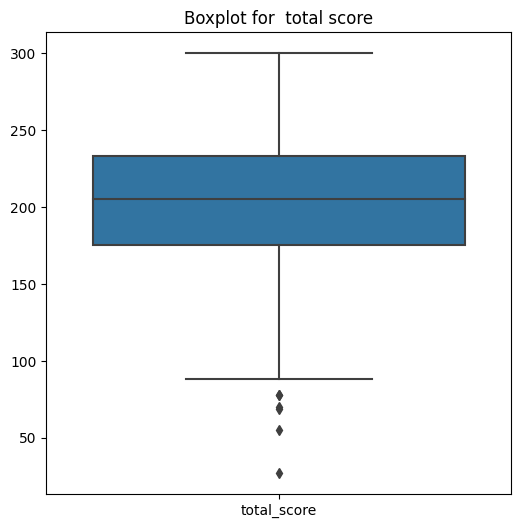

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(data = df['total_score'])
plt.xticks([0], ['total_score'])
plt.title('Boxplot for  total score')
plt.show()

There's not a lot of outliers on this variable.

## Impact of lunch, course, and parents on Students' level.

Pie plots are useful showing distributions, so we will use them to represent lunch and course values.

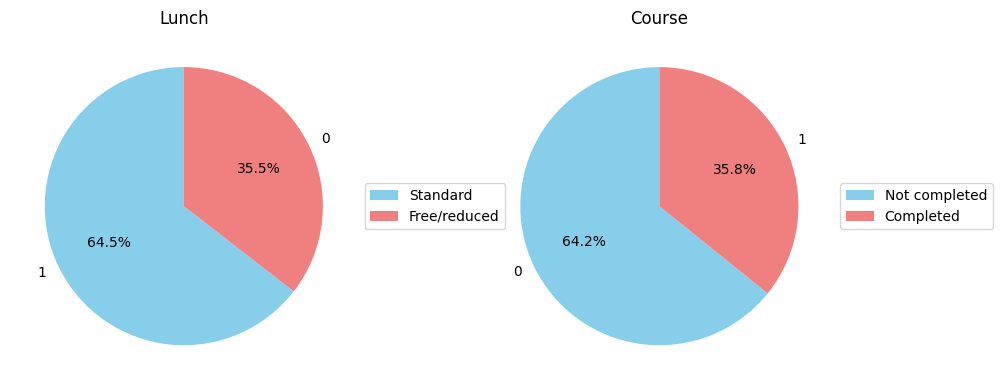

In [13]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
lunch_counts = df['lunch'].value_counts(normalize=True)
labels_lunch = lunch_counts.index 
plt.pie(lunch_counts, labels=labels_lunch, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Lunch')
plt.legend(['Standard', 'Free/reduced'],loc='center left', bbox_to_anchor=(1,0.5))

plt.subplot(1, 2, 2)
course_counts = df['course'].value_counts(normalize=True)
labels_course = course_counts.index 
plt.pie(course_counts, labels=labels_course, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.legend(['Not completed', 'Completed'], loc = 'center left',bbox_to_anchor=(1,0.5))
plt.title('Course')

plt.tight_layout()
plt.show()

With these graphs, observations are:
* Most students take standard lunch before the test.
* Most students do not complete the course.

Interesting. What about the intersection of these two values? Is there any relationship? Considering the numbers are very close to each other on both graphs, maybe the students who take standard lunch do not complete the full course? Let's create a last pie chart to find out.

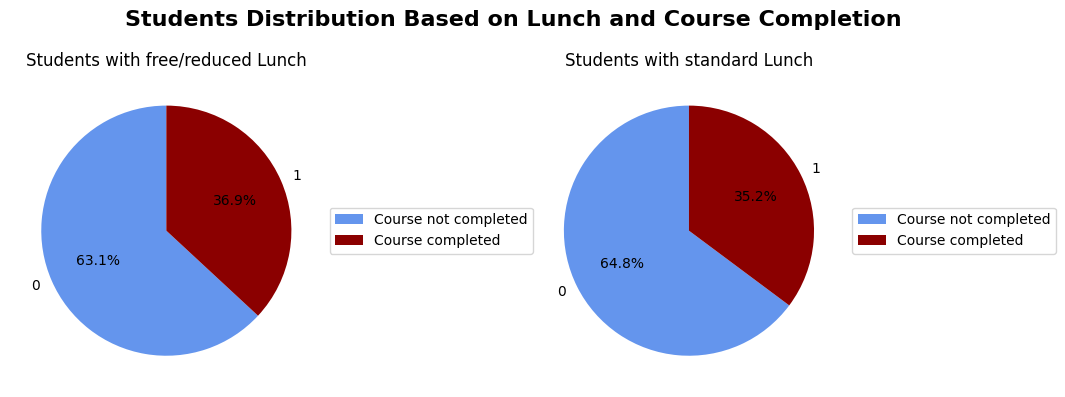

In [14]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
lunch_and_course_counts = df.groupby('lunch')['course'].value_counts()
labels_lunch_and_course_counts = lunch_and_course_counts.index
plt.pie(lunch_and_course_counts[0], labels=lunch_and_course_counts[0].index, autopct='%1.1f%%', startangle=90, colors=['cornflowerblue', 'darkred'])
plt.title('Students with free/reduced Lunch')
plt.legend(['Course not completed', 'Course completed'], loc = 'center left',bbox_to_anchor=(1,0.5))

plt.subplot(1, 2, 2)

plt.pie(lunch_and_course_counts[1], labels=lunch_and_course_counts[1].index, autopct='%1.1f%%', startangle=90, colors=['cornflowerblue', 'darkred'])
plt.title('Students with standard Lunch')
plt.suptitle('Students Distribution Based on Lunch and Course Completion', fontsize=16, fontweight='bold')
plt.legend(['Course not completed', 'Course completed'], loc = 'center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
plt.show()

No, there is no relationship on these groups, as there is no difference on the percentages. Onto the next part.

## New column: 'Level'
Using the total_score column is helpful to understand the students' level. But what if they were separated in levels based on their score? We will create a new column called "level" with this purpose. Having the students divided by their level helps showing the differences in each rank. This new column "level" will be an integer, and it will show the level considering only the scores obtained, divided in 5 groups.

In [15]:
percentiles = df['total_score'].describe(percentiles = np.arange(0,1,0.2))
quintiles = percentiles[['0%', '20%', '40%', '60%', '80%','max']]
labels = [1, 2, 3, 4, 5]
df['level'] = pd.cut(df['total_score'], bins=quintiles, labels=labels, include_lowest=True)
df['level'] = df['level'].astype(int)
df.head()

,gender,race,parent_education,lunch,course,math,reading,writing,total_score,level
0,female,group B,4,1,0,72,72,74,218,4
1,female,group C,2,1,1,69,90,88,247,5
2,female,group B,5,1,0,90,95,93,278,5
3,male,group A,3,0,0,47,57,44,148,1
4,male,group C,2,1,0,76,78,75,229,4


Now we can analyze based on this new 'level' column. Let's calculate the means of each column 'parent_education', 'lunch' and 'course' based on level. Is there any relationship at all? Answering this question can lead to better results on each student.

In [16]:
level_df = df.groupby('level')[['parent_education', 'lunch', 'course']].mean()
level_df

,parent_education,lunch,course
level,,,
1,1.717073,0.429268,0.200000
2,2.029557,0.566502,0.246305
3,2.055556,0.696970,0.383838
4,2.147959,0.739796,0.428571
5,2.469697,0.803030,0.540404


Students with higher parent education, lunch and course values find themselves in a greater level than the rest. This result is vital to the analysis, as it helps understanding where the level gap may come from, and how important these variables are. Drawing this data shows the level gap.

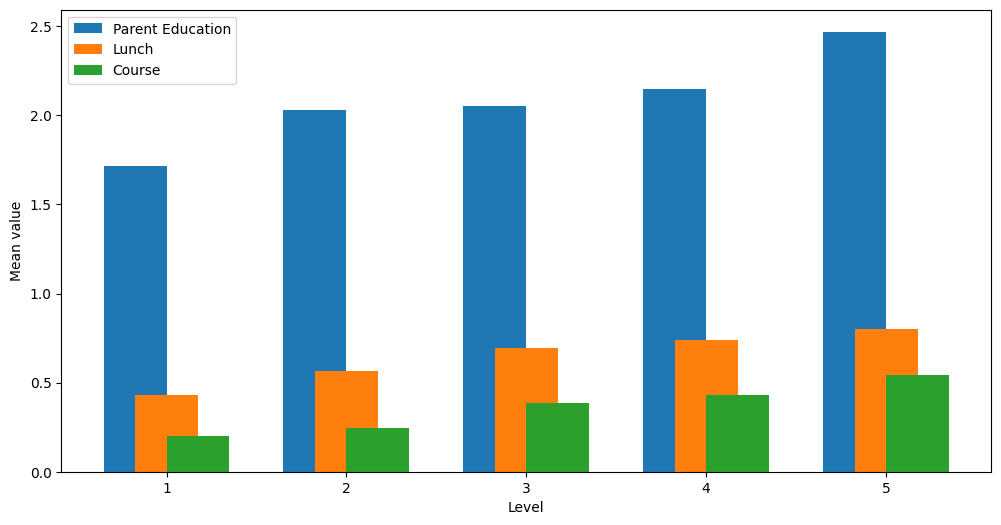

In [17]:
width = 0.35
fig, ax = plt.subplots(figsize = (12,6))
rects1 = ax.bar(level_df.index - width/2, level_df['parent_education'], width, label='Parent Education')
rects2 = ax.bar(level_df.index, level_df['lunch'], width, label='Lunch')
rects3 = ax.bar(level_df.index + width/2, level_df['course'], width, label='Course')

ax.set_xlabel('Level')
ax.set_ylabel('Mean value')
ax.set_xticks(level_df.index)
ax.legend()
plt.show()
#errorbar=None

Visually, the difference is notorious. As level grows, parental education, lunch and course means also grow. 

A higher level on parents education emerges as a crucial factor shaping the student level. Also, emphasizing the role of nutrition and course engagement can lead to better results.

## Demographic
Let's take a look to the students gender and race groups. How are they distributed?

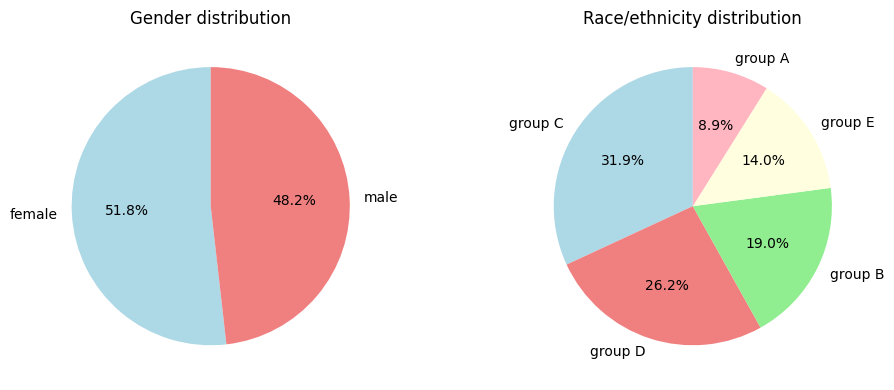

In [18]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
gender_counts = df['gender'].value_counts(normalize=True)
labels_gender = gender_counts.index
plt.pie(gender_counts, labels=labels_gender, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender distribution')

plt.subplot(1, 2, 2)
race_counts = df['race'].value_counts(normalize=True)
labels_race = race_counts.index
plt.pie(race_counts, labels=labels_race, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink'])
plt.title('Race/ethnicity distribution')

plt.tight_layout()
plt.show()

* Slightly more females than males.
* On race/ethnicity, group C and D are the most represented, while A and E are less common.

Creating two new DataFrames with gender/race index and using the means for the rest of the columns should help studying these variables.

In [19]:
columns_to_mean = df.select_dtypes(include = 'number').columns
gender_df = pd.DataFrame(columns = columns_to_mean)
gender_df = df.groupby('gender')[columns_to_mean].mean()
gender_df

,parent_education,lunch,course,math,reading,writing,total_score,level
gender,,,,,,,,
female,2.142857,0.635135,0.355212,63.633205,72.608108,72.467181,208.708494,3.160232
male,2.014523,0.655602,0.360996,68.728216,65.473029,63.311203,197.512448,2.784232


In [20]:
race_df = pd.DataFrame(columns=columns_to_mean)
race_df = df.groupby('race')[columns_to_mean].mean()
race_df

,parent_education,lunch,course,math,reading,writing,total_score,level
race,,,,,,,,
group A,1.786517,0.595506,0.348315,61.629213,64.674157,62.674157,188.977528,2.460674
group B,1.868421,0.636842,0.357895,63.452632,67.352632,65.600000,196.405263,2.789474
group C,2.166144,0.642633,0.366771,64.463950,69.103448,67.827586,201.394984,2.918495
group D,2.118321,0.637405,0.312977,67.362595,70.030534,70.145038,207.538168,3.099237
group E,2.292857,0.707143,0.428571,73.821429,73.028571,71.407143,218.257143,3.478571


Reading the data in this dataframe can be exhausting and not clear enough. Let's draw both of them to find differences with ease!

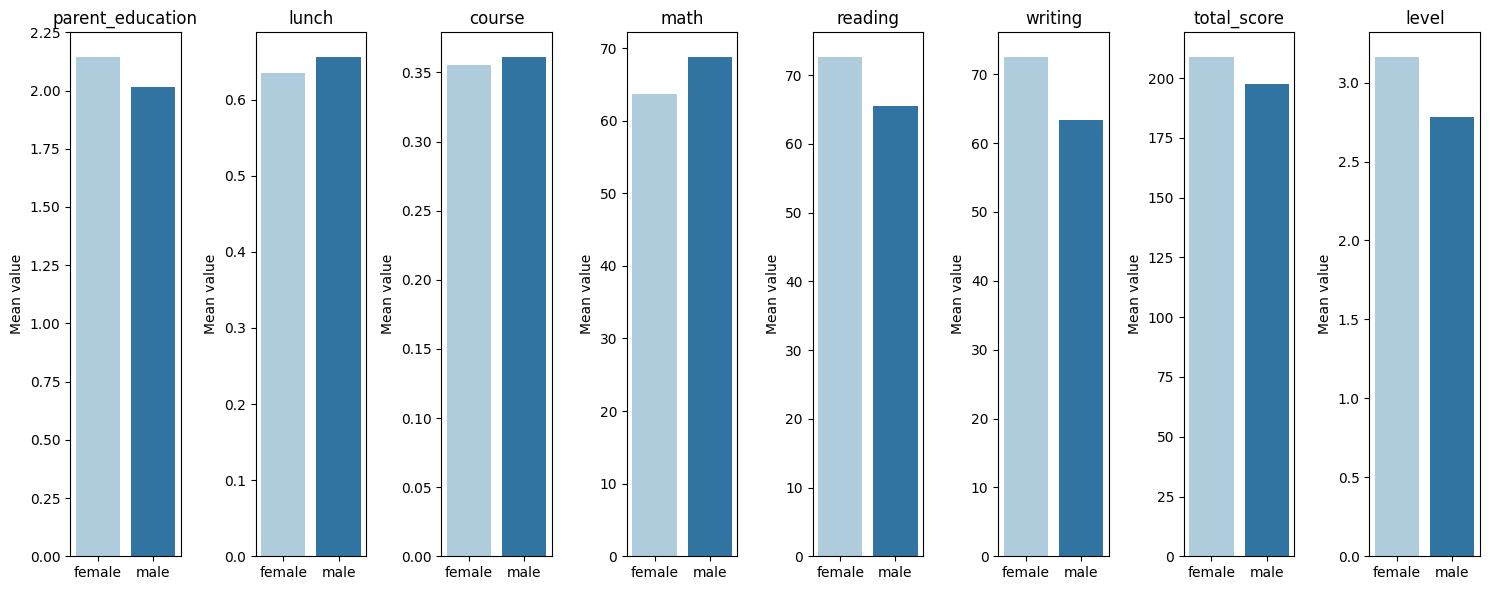

In [21]:
fig, axes = plt.subplots(1, len(gender_df.columns), figsize=(15, 6))

for i, column_name in enumerate(gender_df.columns):
    sns.barplot(x=gender_df.index, y=column_name, data=gender_df, ax=axes[i], palette = 'Paired')
    axes[i].set_title(column_name)
    axes[i].set_ylabel('Mean value')
    axes[i].set_xlabel('')
    

plt.tight_layout()
plt.show()

The differences are:
* Females have better parent_education. They also perform better than males at reading and writing.
* However, males do better on math.
* Females are in a higher level.
* No major differencies on 'lunch' and 'course' variables.

Considering the level discrepancies noted before the gender analysis, perhaps investigating further into this particular detail will show important information.

In [22]:
df.groupby('level')['gender'].value_counts()

level  gender
1      male      119
       female     86
2      male      106
       female     97
3      female    101
       male       97
4      female    116
       male       80
5      female    118
       male       80
Name: count, dtype: int64

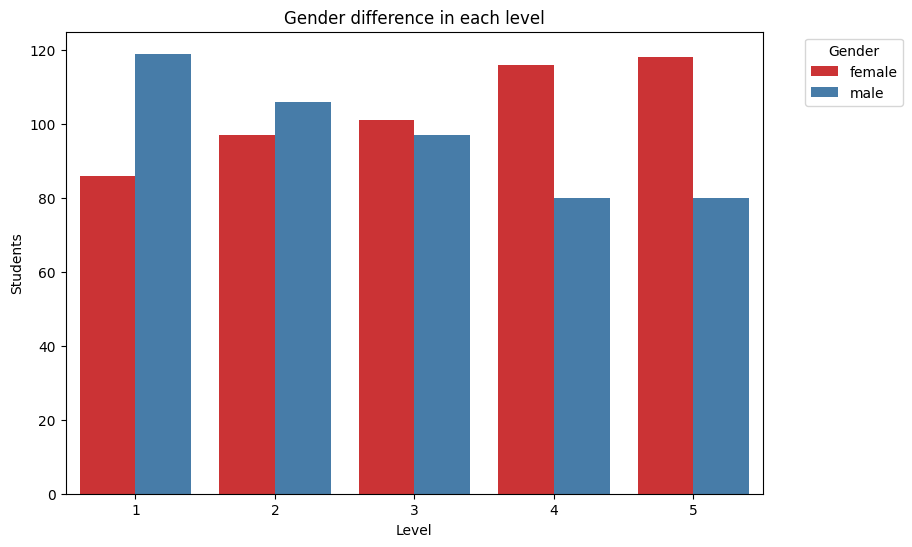

In [23]:
gender_level = df.groupby('gender')['level'].value_counts()
gender_level = gender_level.reset_index()
plt.figure(figsize = (9,6))
sns.barplot(x = 'level', y='count', hue='gender', data=gender_level,  palette='Set1')
plt.ylabel('Students')
plt.xlabel('Level')
plt.title('Gender difference in each level')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The distribution of gender across levels exhibits an inverse relationship. As the level increases, there is a decrease in the representation of males and an increase in the presence of females. This is a pivotal result, considering the population difference is small. This gap is explained through the differences on parents background, and better performance on writing and reading. It should also be taken into account that lunch and course differences are relatively small, even though they have proven to be relevant.


Now, onto the race dataframe.

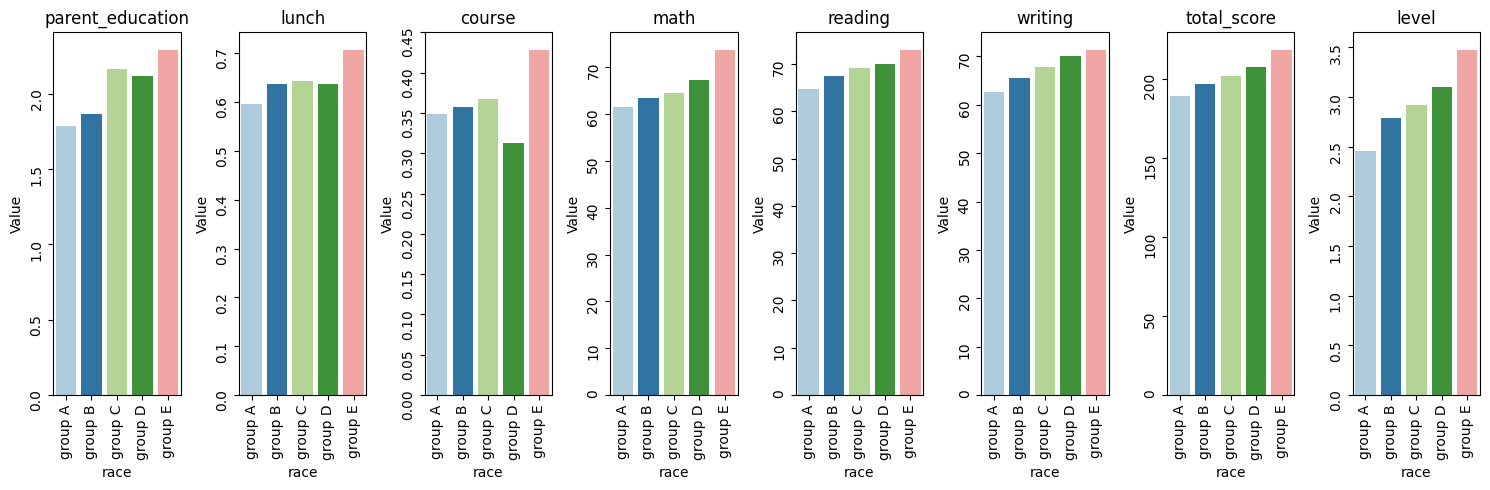

In [24]:
fig, axes = plt.subplots(1, len(race_df.columns), figsize=(15, 5))
for i, column_name in enumerate(race_df.columns):
    sns.barplot(x=race_df.index, y=column_name, data=race_df, ax=axes[i], palette = 'Paired')
    axes[i].set_title(column_name)
    axes[i].set_ylabel('Value')
    axes[i].tick_params(rotation=90)

plt.tight_layout()
plt.show()

* Group E seems to be on top in every chart. Specially in the course completion, noted before as an important factor in the students' level.
* For the rest of groups, light discrepancies such as parent education or course completion.
* On the level category, group A is performing the lowest. This verifies the importance of the parent education and lunch values, as group A has the lowest on both of them. Although this group is the smallest in terms of students on the school, cultural factors should be taken into account. 

## Correlation
Lastly, a brief correlation analysis to put an end, followed by conclusions. We have already discussed the influence of some of the columns on the level. However, some questions still remain, such as:

* Which is more important, parents' education, lunch, or completing the course?
* All tests benefit the same from each factor? Maybe the course improves math in a way it does not improve reading or writing.


I decided to use pd.Categorical to turn gender and race values to numbers, even though some information may be lost on this process.

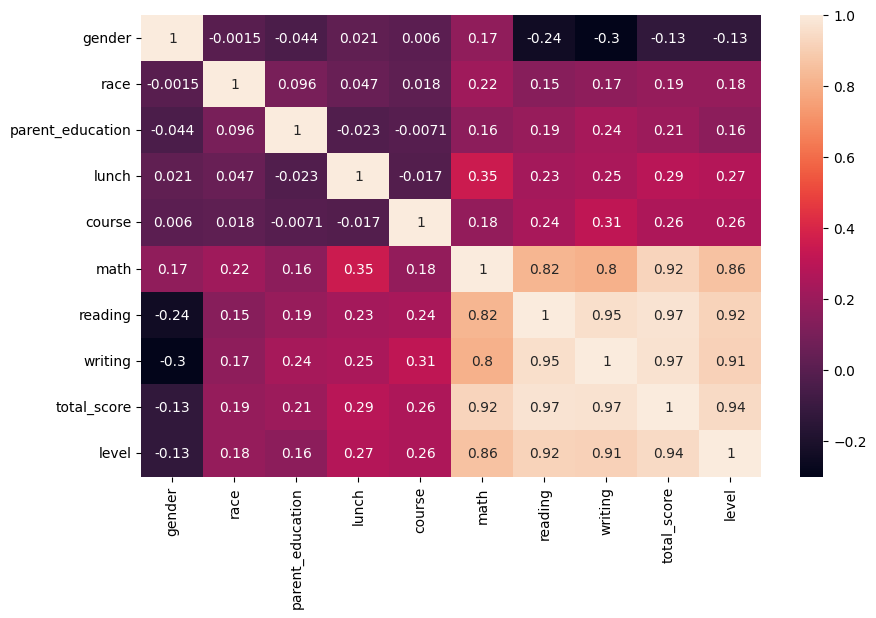

In [25]:
df_corr = df
df_corr['gender']=pd.Categorical(df_corr['gender']).codes
df_corr['race']=pd.Categorical(df_corr['race']).codes
plt.figure(figsize = (10,6))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

## Conclusions
* Gender and race are relevant. In detail, females and group E have better scores.
* parent_education, lunch and course will mean better results. Specifically, lunch-math, course-writing, parent_education-writing have the biggest correlation.
* As schools cannot work on determined factors, as parental background, it is important to understand how improvement can be achieved. Lunch and course play a bigger role than parents' education on the level result, following the correlation chart. Schools may use this data to promote nutrition education and emphasizing on courses.
* Having a standard lunch before the test brings the best results overall.